![citi_bank](images1.png)

# DESCRIPTION
Help Citibank predict defaulters! Citibank has hired you as a Machine Learning Expert to detect default in their newly launched Citi Gold Card. They have hired you as an Machine Learning and FinTech expert. This is an extremely time sensitive and urgent project as defaulters cause substantial loss to the system. They are willing to compensate heavily! Defaulters cause annually over ~ USD 50 Billion in losses.

# DATASET
- X1 - Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- X2 -Gender (1 = male; 2 = female).
- X3 - Education (1 = graduate school; 2 = university; 3 = high school; 0,4,5,6 = others).
- X4 - Marital status (1 = married; 2 = single; 3 = divorce; 0=others).
- X5 - Age (year).
- X6-X11 - History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -2 = No consumption; -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above
- X12-X17 - Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
- X18-X23 - Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.


In [1]:
# Load libraries
import numpy as np
from numpy import arange
from matplotlib import pyplot
from matplotlib import pyplot as plt
import pandas as pd
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier




from sklearn.metrics import accuracy_score
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

C:\Users\DINESHKUMAR\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [10]:
# Load dataset
train1=pd.read_csv('train1.csv')
train2=pd.read_csv('train2.csv')
train3=pd.read_csv('train3.csv')

In [11]:
df_complete=pd.merge(train1,train2,on=['Ref.No'])
df_complete=pd.merge(df_complete,train3,on=['Ref.No'])

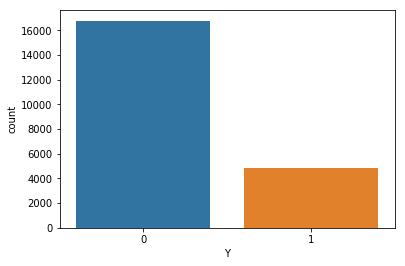

In [12]:
sn.countplot(train1['Y'])

The target column contains more non-defaulters,so that the model will most likely to predict the non-defaulters than defaulters

In [17]:
df_complete.describe().T['50%']

Ref.No     12001.5
X1        140000.0
X2             2.0
X3             2.0
X4             2.0
X5            34.0
X6             0.0
X7             0.0
Y              0.0
X8             0.0
X9             0.0
X10            0.0
X11            0.0
X12        22182.0
X13        21095.5
X14        19978.0
X15        18893.0
X16        18019.0
X17        16845.0
X18         2100.0
X19         2000.0
X20         1700.0
X21         1500.0
X22         1500.0
X23         1498.5
Name: 50%, dtype: float64

- Amount of bill payment -> X12-X17(from sep. 2015(X12) to Apr. 2015(X17)) the median has increased for every month.
- Amount of previous payment -> X18-X23(from sep. 2015(X12) to Apr. 2015(X17)) the median is almost constant for first three months and gradually increased for next three months

In [9]:
df_complete['pay_mode']=df_complete[df_complete.columns[6:13]].T.mode()[:1].T

In [22]:
df_complete.isnull().any()

Ref.No    False
X1        False
X2        False
X3        False
X4        False
X5        False
X6        False
X7        False
Y         False
X8        False
X9        False
X10       False
X11       False
X12       False
X13       False
X14       False
X15       False
X16       False
X17       False
X18       False
X19       False
X20       False
X21       False
X22       False
X23       False
dtype: bool

There is no null column in the given dataset

In [24]:
#Drop the Id column(Ref.No)
df_complete=df_complete.drop(['Ref.No'],axis=1)

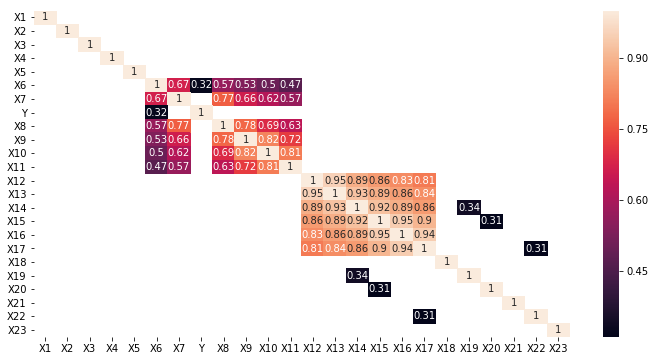

In [25]:
pyplot.subplots(figsize=(12,6))
sn.heatmap(df_complete.corr()[df_complete.corr()>0.3],annot=True)

- The correlation chart shows that the history of payments,amount of bill payment have strong corelation within themselves.
- Only history of payment have some correlation with target column

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x_features = list(df_complete)
data_mat = df_complete[x_features].as_matrix()
data_mat.shape
vif = [ variance_inflation_factor( data_mat,i) for i in range(data_mat.shape[1]) ]
vif_factors = pd.DataFrame()
vif_factors['column'] = list(x_features)
vif_factors['vif'] = vif
print(vif_factors)

   column        vif
0      X1   4.053148
1      X2   9.421567
2      X3   6.841449
3      X4   6.351399
4      X5  10.939635
5      X6   1.975513
6      X7   3.207119
7       Y   1.449422
8      X8   3.765116
9      X9   4.531212
10    X10   4.891754
11    X11   3.368553
12    X12  21.301526
13    X13  39.250470
14    X14  32.146346
15    X15  30.722554
16    X16  37.368338
17    X17  20.649770
18    X18   1.794588
19    X19   2.472503
20    X20   1.702398
21    X21   1.775662
22    X22   1.845085
23    X23   1.291618


In [142]:
# Split-out validation dataset
#X = df_complete.drop(['Y','Ref.No','X6','X7','X8','X9','X10','X11'], axis=1)
X = df_complete.drop(['Y','X5','X12','X13','X14','X15','X16','X17','X18'], axis=1)
Y = df_complete[['Y']]

In [143]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [144]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'
# Spot-Check Algorithms
models = []
models.append(('Logistic', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF',RandomForestClassifier()))
models.append(('GB',GradientBoostingClassifier()))

In [145]:
# evaluate each model in turn
results = []
names = []
model_comp=pd.DataFrame(columns=['Model','Test Accuracy','Std.Dev'])
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    model_comp=model_comp.append([{'Model':name, 'Test Accuracy':cv_results.mean(), 'Std.Dev':cv_results.std()}],ignore_index=True)
    
model_comp

,Model,Test Accuracy,Std.Dev
0,Logistic,0.774074,0.008144
1,KNN,0.746991,0.010066
2,CART,0.717940,0.014730
3,RF,0.794850,0.007275
4,GB,0.815683,0.009041


The 10 fold Crossval accuracy score of each model comparison without scaling shows GradientBoost will give 
best accuracy when compare with other model with low standard deviation.

In [60]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([ ('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledLogistic', Pipeline([('Scaler', StandardScaler()), ('Logistic', LogisticRegression())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()), ('RF', RandomForestClassifier())])))
pipelines.append(('ScaledGB', Pipeline([('Scaler', StandardScaler()), ('GB', GradientBoostingClassifier())])))


In [61]:
model_comp=pd.DataFrame(columns=['Model','Test Accuracy','Std.Dev'])
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    model_comp=model_comp.append([{'Model':name, 'Test Accuracy':cv_results.mean(), 'Std.Dev':cv_results.std()}],ignore_index=True)
    
model_comp

,Model,Test Accuracy,Std.Dev
0,ScaledKNN,0.791030,0.009049
1,ScaledCART,0.720081,0.017914
2,ScaledLogistic,0.805324,0.008136
3,ScaledRF,0.795428,0.007155
4,ScaledGB,0.815625,0.008973


Eventhough the crossval accuracy score of Logistic,KNN increased for scaled value, the GradientBoost seems to be good.

In [161]:
model=GradientBoostingClassifier()
model=model.fit(X_train,Y_train)

In [162]:
model1=BaggingClassifier(GradientBoostingClassifier())
model1=model1.fit(X_train,Y_train)

In [163]:
final_pred=model1.predict(X_validation)

In [148]:
print(accuracy_score(Y_validation, final_pred))

0.8275462962962963


In [150]:
# Load the test dataset
df_test=pd.read_csv('test_credit.csv')

In [153]:
x_test = df_test.drop(['Y','Ref.No','X5','X12','X13','X14','X15','X16','X17','X18'], axis=1)

In [154]:
pred=pd.DataFrame()
pred['Ref.No']=df_test['Ref.No']
pred['Y']=pd.DataFrame(data=model.predict(x_test))

In [159]:
pred['Y'].value_counts()

0    2091
1     308
Name: Y, dtype: int64

In [158]:
pred.to_csv('last.csv',index=False)